In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
from sklearn.decomposition import PCA 
import matplotlib.pyplot as plt 

X = pd.read_parquet("../artifacts/features.parquet")
metadata = pd.read_parquet("../artifacts/metadata.parquet")

print(f"X shape: {X.shape}")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X shape: (50878, 36)


Dimensions needed for PCA to preserve 0.9 is 27


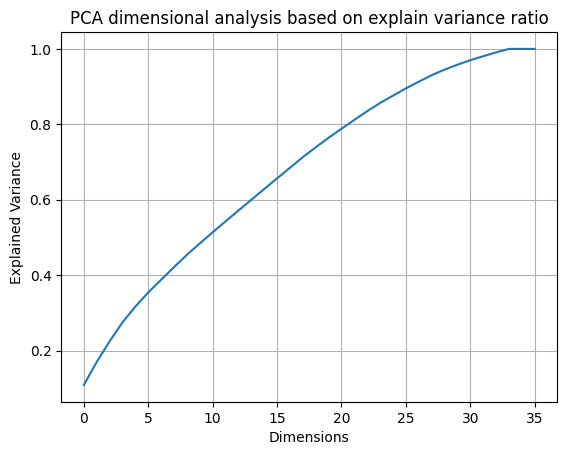

In [17]:

# get a cumulative sum of variance preserved
preserved_variance = 0.90
pca = PCA(n_components=preserved_variance)
pca.fit_transform(X_scaled)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= preserved_variance) + 1

print(f"Dimensions needed for PCA to preserve {preserved_variance} is {pca.n_components_}")

pca2 = PCA()
pca2.fit(X_scaled)

plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.title("PCA dimensional analysis based on explain variance ratio")
plt.grid(True)

plt.show()


